In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
df = pd.read_csv("cleaned_data_with_latlong.csv")

In [3]:
df.head()

,REGION,PROV_CODE,PROV_NAME,DIST_CODE,DIST_NAME,INC_DATE,INC_TYPE,Persons_killed,Persons_injured,Individuals_affected,Families_affected,Houses_damaged,Houses_destroyed,Season,Latitude,Longitude
0,Eastern,7,Laghman,701,Mehtarlam,2016-01-31,Flood / flash flood,0,0,62,10,8,2,Winter,34.666954,70.071718
1,North Eastern,15,Badakhshan,1504,Arghanjkhwa,2016-02-13,Avalanche,3,0,21,3,0,0,Winter,37.366577,70.970672
2,Central Highland,22,Daykundi,2207,Sang-e-Takht,2016-03-07,Flood / flash flood,10,1,19,8,0,5,Spring,34.178306,65.860740
3,Northern,18,Balkh,1803,Shortepa,2016-03-10,Flood / flash flood,0,0,1533,219,0,219,Spring,37.213477,66.832580
4,Western,31,Farah,3101,Farah,2016-03-11,Flood / flash flood,18,9,996,150,88,32,Spring,32.234080,62.222932


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589 entries, 0 to 2588
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REGION                2589 non-null   object 
 1   PROV_CODE             2589 non-null   int64  
 2   PROV_NAME             2589 non-null   object 
 3   DIST_CODE             2589 non-null   int64  
 4   DIST_NAME             2589 non-null   object 
 5   INC_DATE              2589 non-null   object 
 6   INC_TYPE              2589 non-null   object 
 7   Persons_killed        2589 non-null   int64  
 8   Persons_injured       2589 non-null   int64  
 9   Individuals_affected  2589 non-null   int64  
 10  Families_affected     2589 non-null   int64  
 11  Houses_damaged        2589 non-null   int64  
 12  Houses_destroyed      2589 non-null   int64  
 13  Season                2589 non-null   object 
 14  Latitude              2589 non-null   float64
 15  Longitude            

In [5]:
df.describe()

,PROV_CODE,DIST_CODE,Persons_killed,Persons_injured,Individuals_affected,Families_affected,Houses_damaged,Houses_destroyed,Latitude,Longitude
count,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000
mean,14.321360,1438.291232,0.929703,1.415218,361.327153,52.451139,31.086906,15.151796,34.707445,68.831875
std,8.416575,841.343008,18.556810,31.123331,1684.494835,241.358164,142.317297,115.014217,1.249136,2.544037
min,1.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.853347,61.053751
25%,7.000000,703.000000,0.000000,0.000000,21.000000,3.000000,1.000000,0.000000,34.163208,67.640391
50%,13.000000,1306.000000,0.000000,0.000000,70.000000,10.000000,6.000000,0.000000,34.745481,69.697367
75%,19.000000,1902.000000,0.000000,0.000000,210.000000,30.000000,19.000000,3.000000,35.108166,70.728239
max,34.000000,3405.000000,860.000000,1193.000000,41034.000000,5913.000000,3674.000000,3752.000000,38.444539,71.508298


In [6]:
df.isnull().sum()

REGION                  0
PROV_CODE               0
PROV_NAME               0
DIST_CODE               0
DIST_NAME               0
INC_DATE                0
INC_TYPE                0
Persons_killed          0
Persons_injured         0
Individuals_affected    0
Families_affected       0
Houses_damaged          0
Houses_destroyed        0
Season                  0
Latitude                0
Longitude               0
dtype: int64

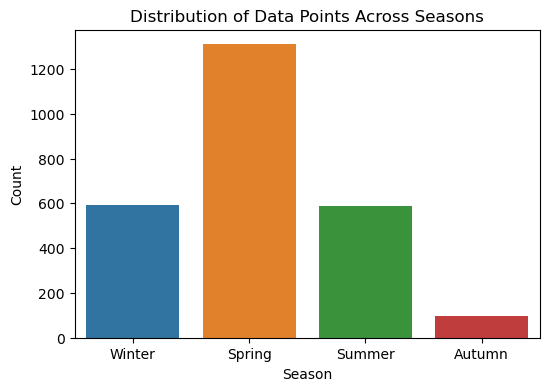

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Season')
plt.title('Distribution of Data Points Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

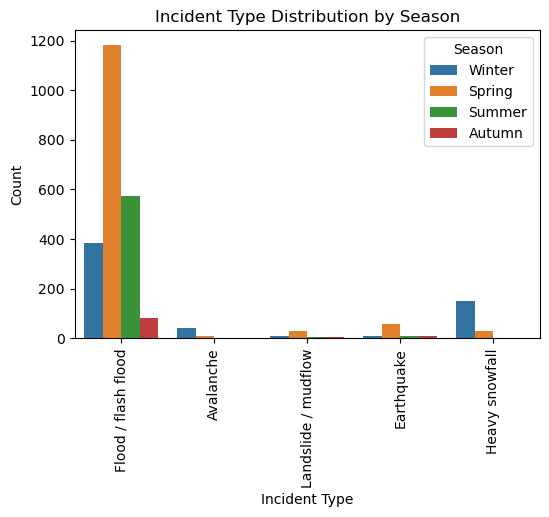

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='INC_TYPE', hue='Season')
plt.title('Incident Type Distribution by Season')
plt.xticks(rotation=90)
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.show()

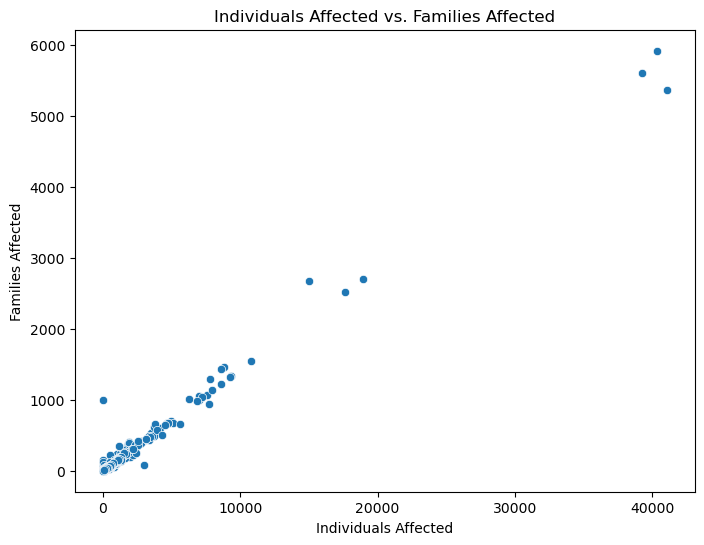

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Individuals_affected', y='Families_affected')
plt.title('Individuals Affected vs. Families Affected')
plt.xlabel('Individuals Affected')
plt.ylabel('Families Affected')
plt.show()

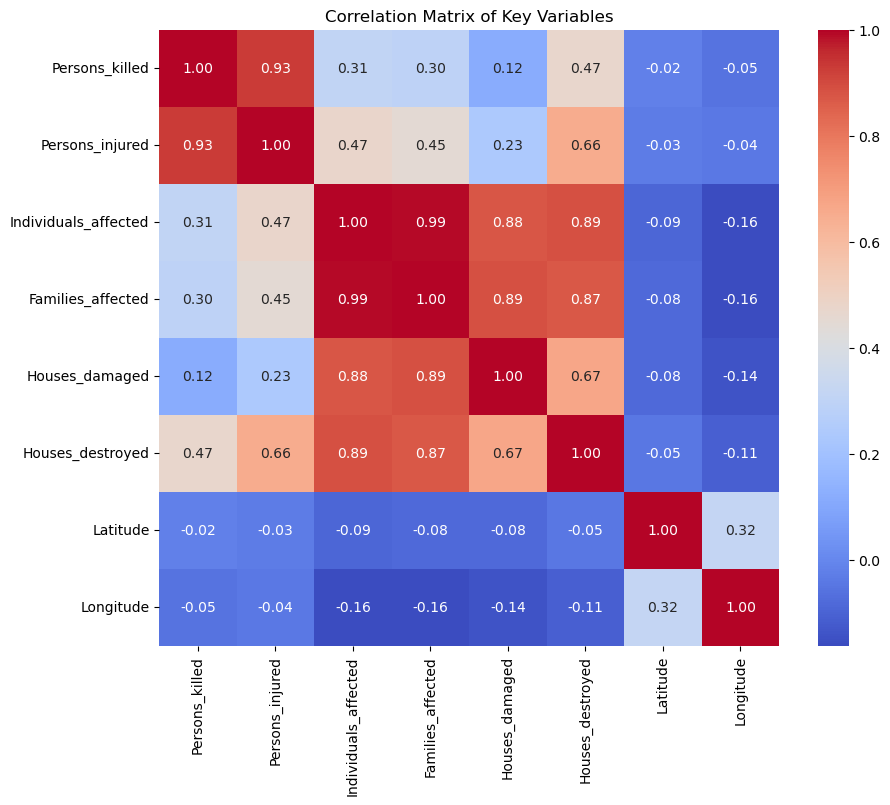

In [11]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['Persons_killed', 'Persons_injured', 'Individuals_affected', 
                  'Families_affected', 'Houses_damaged', 'Houses_destroyed','Latitude','Longitude']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()

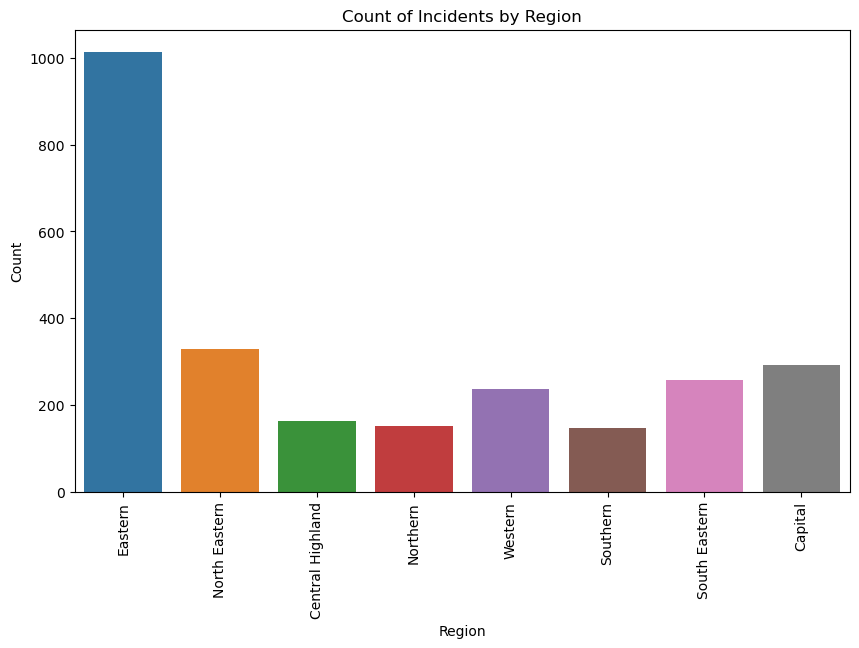

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='REGION')
plt.title('Count of Incidents by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

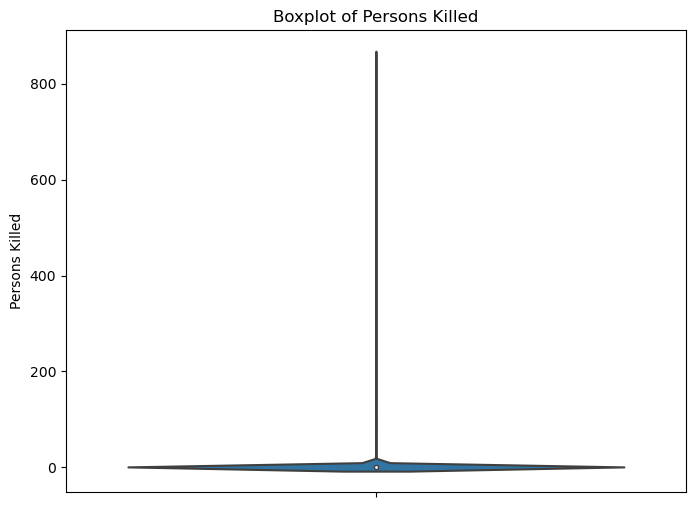

In [24]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, y='Persons_killed')
plt.title('Boxplot of Persons Killed')
plt.ylabel('Persons Killed')
plt.show()

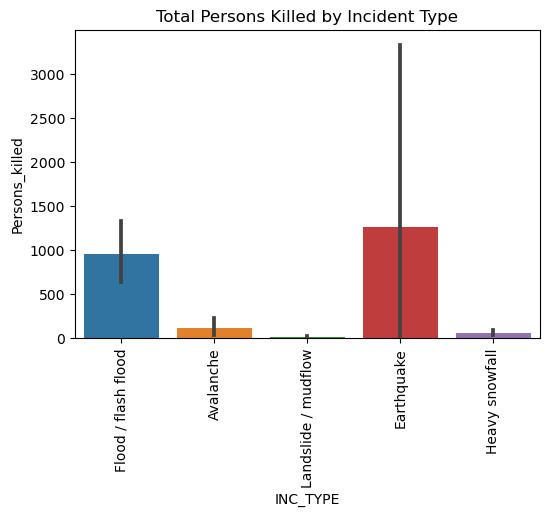

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='INC_TYPE', y='Persons_killed', estimator=sum)
plt.title('Total Persons Killed by Incident Type')
plt.xticks(rotation=90)
plt.show()

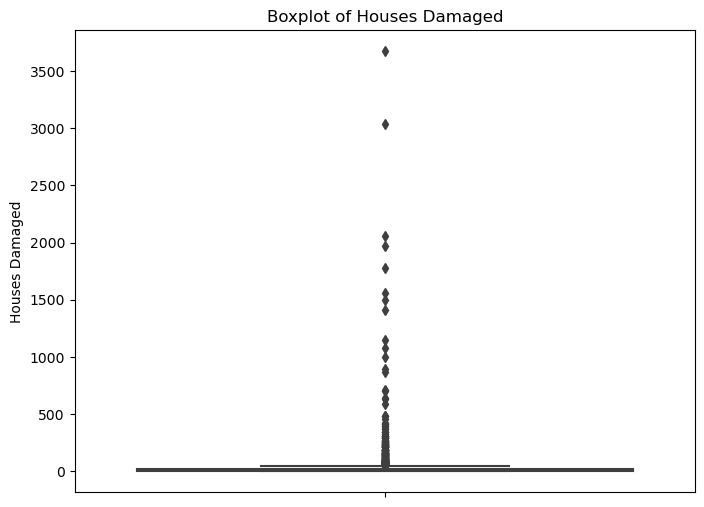

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Houses_damaged')
plt.title('Boxplot of Houses Damaged')
plt.ylabel('Houses Damaged')
plt.show()

In [32]:
df.head()

,REGION,PROV_CODE,PROV_NAME,DIST_CODE,DIST_NAME,INC_DATE,INC_TYPE,Persons_killed,Persons_injured,Individuals_affected,Families_affected,Houses_damaged,Houses_destroyed,Season,Latitude,Longitude
0,Eastern,7,Laghman,701,Mehtarlam,2016-01-31,Flood / flash flood,0,0,62,10,8,2,Winter,34.666954,70.071718
1,North Eastern,15,Badakhshan,1504,Arghanjkhwa,2016-02-13,Avalanche,3,0,21,3,0,0,Winter,37.366577,70.970672
2,Central Highland,22,Daykundi,2207,Sang-e-Takht,2016-03-07,Flood / flash flood,10,1,19,8,0,5,Spring,34.178306,65.860740
3,Northern,18,Balkh,1803,Shortepa,2016-03-10,Flood / flash flood,0,0,1533,219,0,219,Spring,37.213477,66.832580
4,Western,31,Farah,3101,Farah,2016-03-11,Flood / flash flood,18,9,996,150,88,32,Spring,32.234080,62.222932


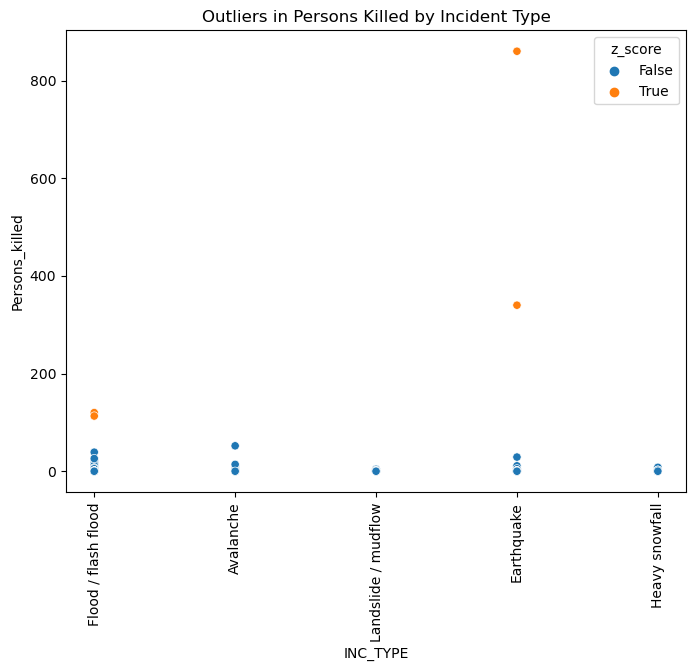

In [33]:
from scipy.stats import zscore
df['z_score'] = zscore(df['Persons_killed'])
outliers = df[df['z_score'].abs() > 3]  # Outliers with z-score > 3
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='INC_TYPE', y='Persons_killed', hue=(df['z_score'].abs() > 3))
plt.title('Outliers in Persons Killed by Incident Type')
plt.xticks(rotation=90)
plt.show()

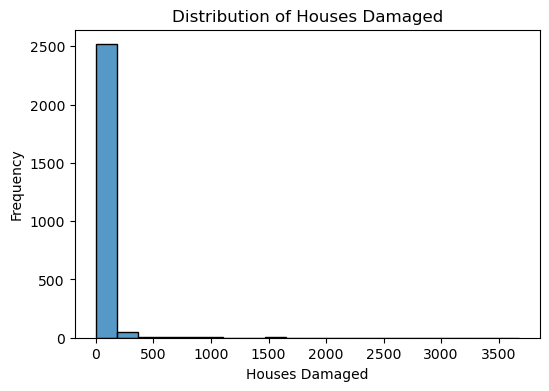

In [36]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Houses_damaged', bins=20)
plt.title('Distribution of Houses Damaged')
plt.xlabel('Houses Damaged')
plt.ylabel('Frequency')
plt.show()

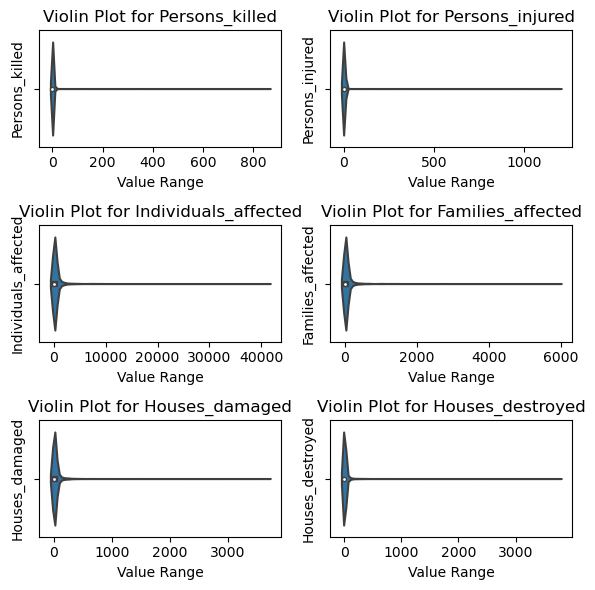

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables for plotting
numerical_columns = ['Persons_killed', 'Persons_injured', 'Individuals_affected', 
                     'Families_affected', 'Houses_damaged', 'Houses_destroyed']

# Create a figure with subplots arranged in 2 columns and 3 rows
fig, axes = plt.subplots(3, 2, figsize=(6, 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each numerical column and plot in the corresponding subplot
for i, col in enumerate(numerical_columns):
    sns.violinplot(x=df[col], orient='h', ax=axes[i])
    
    # Adding labels and title for each subplot
    axes[i].set_title(f'Violin Plot for {col}')
    axes[i].set_xlabel('Value Range')
    axes[i].set_ylabel(col)

# Remove any extra subplots (if they exist) in the layout
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [48]:
import pandas as pd
import numpy as np
#import tensorflow.compat.v1 as tf
import tensorflow as tf
from tqdm import tqdm
from utils import *
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
## imputations
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # Needed to import IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
import fancyimpute
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode
from sklearn.decomposition import PCA

In [49]:
#new_data_cleaned = new_data.drop(columns=['PROV_NAME', 'DIST_NAME', 'INC_DATE', 'PROV_CODE', 'DIST_CODE'])
df_cleaned = df.drop(columns=['PROV_NAME', 'DIST_NAME', 'INC_DATE'])
#dataset = df_cleaned.copy()
# Encoding categorical columns: 'REGION', 'INC_TYPE', and 'Season'
label_encoder = LabelEncoder()
df_cleaned['REGION'] = label_encoder.fit_transform(df_cleaned['REGION'])
df_cleaned['INC_TYPE'] = label_encoder.fit_transform(df_cleaned['INC_TYPE'])
df_cleaned['Season'] = label_encoder.fit_transform(df_cleaned['Season'])

# Using 'Season' as the label
X_features_season = df_cleaned.drop(columns=['Season'])  # Drop 'Season' from features
y_labels_season = df_cleaned['Season']  # 'Season' is the label

# Standardizing the feature set
scaler = StandardScaler()
X_scaled_features_season = scaler.fit_transform(X_features_season)

In [50]:
# Apply K-means clustering with 4 clusters (for 'Season')
kmeans_fixed_season = KMeans(n_clusters=4, random_state=42)
kmeans_fixed_season.fit(X_scaled_features_season)

# Calculate the silhouette score for clustering based on 'Season'
silhouette_avg_fixed_season = silhouette_score(X_scaled_features_season, kmeans_fixed_season.labels_)

# Display the silhouette score
print(f'Silhouette Score for Season: {silhouette_avg_fixed_season}')

/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for Season: 0.4883904177035796


In [51]:
db_index = davies_bouldin_score(X_scaled_features_season, kmeans_fixed_season.labels_)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8348094771751282


In [52]:
# Apply K-means clustering with 4 clusters (for 'Season')
kmeans_fixed_season = KMeans(n_clusters=3, random_state=42)
kmeans_fixed_season.fit(X_scaled_features_season)

# Calculate the silhouette score for clustering based on 'Season'
silhouette_avg_fixed_season = silhouette_score(X_scaled_features_season, kmeans_fixed_season.labels_)

# Display the silhouette score
print(f'Silhouette Score for Season: {silhouette_avg_fixed_season}')

/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for Season: 0.49100256945091886


In [53]:
db_index = davies_bouldin_score(X_scaled_features_season, kmeans_fixed_season.labels_)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9103989339455892
